In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_california_housing

# Fetching the dataset
housing = fetch_california_housing(as_frame=True)

# Converting to DataFrame for easier manipulation
data = pd.DataFrame(housing.data, columns=housing.feature_names)

# Adding the target variable (Price)
data['PRICE'] = housing.target

# Check the shape of the dataset
print(data.shape)

(20640, 9)


In [4]:
# Displaying the first few rows of the dataset
print(data.head())

# Checking for missing values
print(data.isnull().sum())

# Descriptive statistics
print(data.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.8998

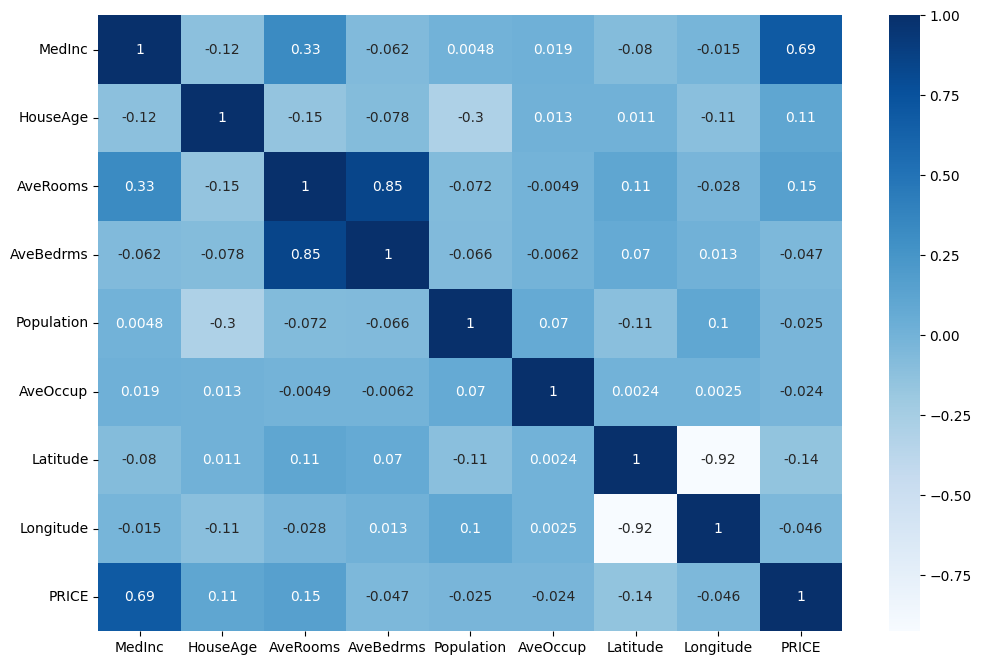

In [5]:
# Finding the correlation between features
corr = data.corr()

# Plotting the heatmap of correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [6]:
# Independent variables (features)
X = data.drop('PRICE', axis=1)

# Target variable
y = data['PRICE']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [7]:
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training set
lm.fit(X_train, y_train)

# Value of the intercept
print("Intercept:", lm.intercept_)

# Coefficients for each feature
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lm.coef_})
print(coefficients)

Intercept: -36.925884298845915
      Feature  Coefficient
0      MedInc     0.438284
1    HouseAge     0.009021
2    AveRooms    -0.113436
3   AveBedrms     0.648835
4  Population    -0.000008
5    AveOccup    -0.003978
6    Latitude    -0.421168
7   Longitude    -0.434680


In [8]:
# Model prediction on training data
y_train_pred = lm.predict(X_train)

# Evaluation metrics
r2_train = metrics.r2_score(y_train, y_train_pred)
adjusted_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Print the metrics
print(f'R^2: {r2_train}')
print(f'Adjusted R^2: {adjusted_r2_train}')
print(f'MAE: {mae_train}')
print(f'MSE: {mse_train}')
print(f'RMSE: {rmse_train}')

R^2: 0.6081901093734017
Adjusted R^2: 0.6079730251483852
MAE: 0.5319076620403785
MSE: 0.5258454910434389
RMSE: 0.7251520468449627


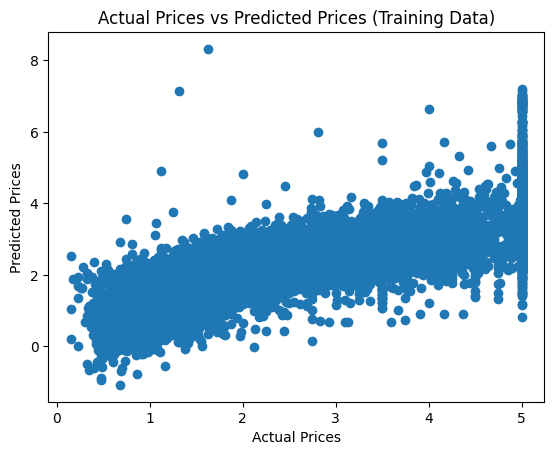

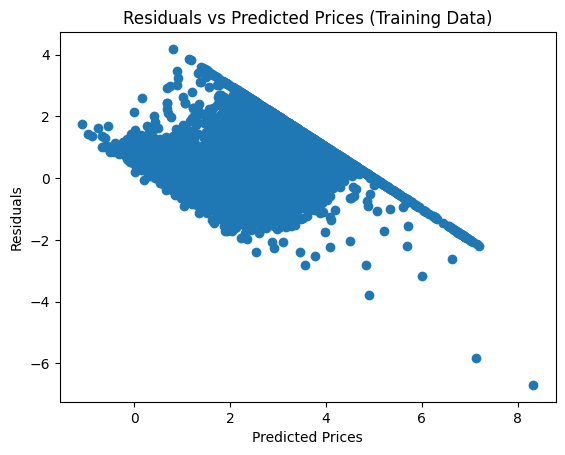

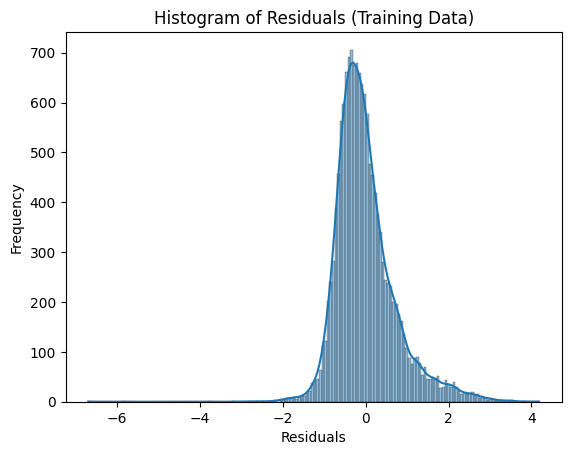

In [9]:
# Plotting actual vs predicted values
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Training Data)")
plt.show()

# Residual plot
plt.scatter(y_train_pred, y_train - y_train_pred)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices (Training Data)")
plt.show()

# Histogram of residuals
sns.histplot(y_train - y_train_pred, kde=True)
plt.title("Histogram of Residuals (Training Data)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [10]:
# Predicting on test data
y_test_pred = lm.predict(X_test)

# Evaluation metrics
r2_test = metrics.r2_score(y_test, y_test_pred)
adjusted_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Print the metrics
print(f'R^2: {r2_test}')
print(f'Adjusted R^2: {adjusted_r2_test}')
print(f'MAE: {mae_test}')
print(f'MSE: {mse_test}')
print(f'RMSE: {rmse_test}')

R^2: 0.6010291338754374
Adjusted R^2: 0.6005129173253814
MAE: 0.5303872778945677
MSE: 0.5213468821374594
RMSE: 0.7220435458734185


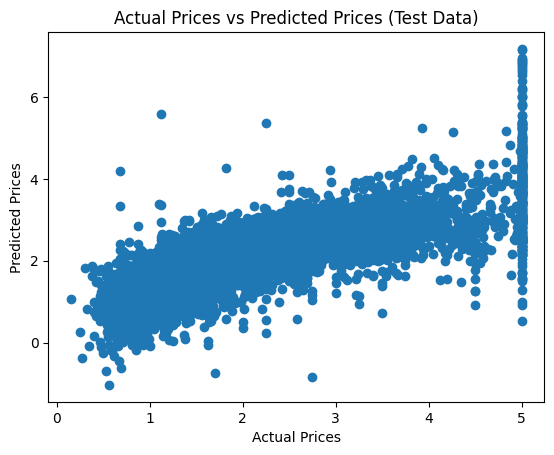

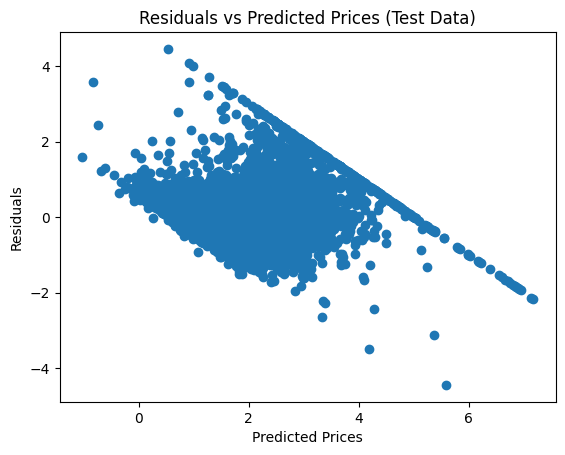

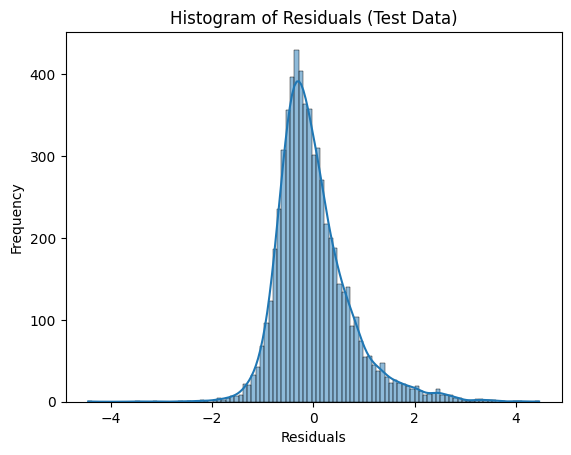

In [11]:
# Plotting actual vs predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Test Data)")
plt.show()

# Residual plot
plt.scatter(y_test_pred, y_test - y_test_pred)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices (Test Data)")
plt.show()

# Histogram of residuals
sns.histplot(y_test - y_test_pred, kde=True)
plt.title("Histogram of Residuals (Test Data)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()